In [1]:
url='https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv'
import pandas as pd

df=pd.read_csv(url)


In [3]:
df.to_csv("income.csv",index=False)
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Income($)')

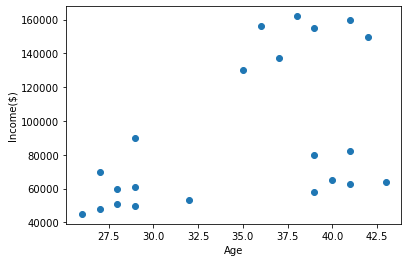

In [5]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [7]:
from sklearn.cluster import KMeans

In [15]:
km =KMeans(n_clusters=3)

In [16]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [17]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [18]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [20]:
df1.head()

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


In [21]:
df2.head()

,Name,Age,Income($),cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1


In [23]:
df3.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


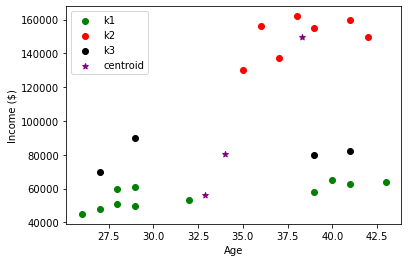

In [36]:
plt.scatter(df1.Age,df1['Income($)'],color='green',label='k1')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='k2')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='k3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using min max scaler

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
scaler.fit(df[['Income($)']])
df['Income ($)']= scaler.transform(df[['Income($)']])

In [46]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [47]:
df.head()

,Name,Age,Income($),cluster,Income ($)
0,Rob,0.058824,70000,2,0.213675
1,Michael,0.176471,90000,2,0.384615
2,Mohan,0.176471,61000,0,0.136752
3,Ismail,0.117647,60000,0,0.128205
4,Kory,0.941176,150000,1,0.897436


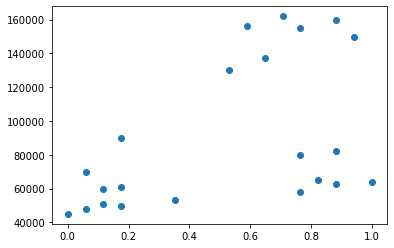

In [48]:
plt.scatter(df.Age,df['Income($)'])

In [49]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [50]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster,Income ($)
0,Rob,0.058824,70000,0,0.213675
1,Michael,0.176471,90000,0,0.384615
2,Mohan,0.176471,61000,2,0.136752
3,Ismail,0.117647,60000,2,0.128205
4,Kory,0.941176,150000,1,0.897436


In [51]:
km.cluster_centers_

array([[4.70588235e-01, 8.05000000e+04],
       [7.22689076e-01, 1.50000000e+05],
       [4.06417112e-01, 5.61363636e+04]])

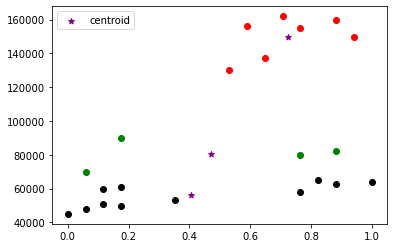

In [52]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot

In [53]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\PIYUSH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


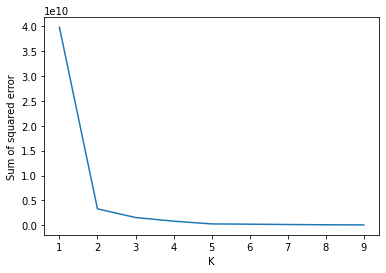

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)